In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classification-of-math-problems-by-kasut-academy/sample_submission.csv
/kaggle/input/classification-of-math-problems-by-kasut-academy/train.csv
/kaggle/input/classification-of-math-problems-by-kasut-academy/test.csv


Starting the challenge

In [2]:
#let's first important library
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("/kaggle/input/classification-of-math-problems-by-kasut-academy/train.csv")
test=pd.read_csv("/kaggle/input/classification-of-math-problems-by-kasut-academy/test.csv")

In [4]:
df.head(10)

,Question,label
0,A solitaire game is played as follows. Six di...,3
1,2. The school table tennis championship was he...,5
2,"Given that $x, y,$ and $z$ are real numbers th...",0
3,$25 \cdot 22$ Given three distinct points $P\l...,1
4,I am thinking of a five-digit number composed ...,5
5,"6.1. On 19 cards, the numbers $15,16,17, \ldot...",5
6,"10.033. A tangent, parallel to the base, is dr...",1
7,11. (20 points) The ellipse $E$ with eccentric...,1
8,Example 3 Find the minimum value of the functi...,2
9,Consider a \textit{growing spiral} in the plan...,5


In [5]:
# checking the null value first
df.isnull().sum()

Question    0
label       0
dtype: int64

In [6]:
#checking for any duplicate value present in this df
df.duplicated().sum()

0

In [7]:
df['label'].value_counts()

label
0    2618
1    2439
5    1827
4    1712
2    1039
3     368
6     100
7      86
Name: count, dtype: int64

as i checked the df label its seems dataset is imbalance

In [8]:
#let's check data of each category first which can help us to understand the text file
class_1 = df[df['label']==1]
class_1.iloc[1]['Question']

'10.033. A tangent, parallel to the base, is drawn to the circle inscribed in an isosceles triangle with a base of 12 cm and a height of 8 cm. Find the length of the segment of this tangent, enclosed between the sides of the triangle.'

In [9]:
class_2 = df[df['label']==2]
class_2.iloc[1]['Question']

'EXAMPLE. Calculate the length of the arc of a curve given parametrically\n\n$$\n\\left\\{\\begin{array}{l}\nx=\\left(t^{2}-2\\right) \\sin t+2 t \\cos t, \\\\\ny=\\left(2-t^{2}\\right) \\cos t+2 t \\sin t,\n\\end{array} \\quad 0 \\leq t \\leq \\pi\\right.\n$$'

In [10]:
class_3 = df[df['label']==3]
class_3.iloc[1]['Question']

'3. Let $[x]$ denote the greatest integer not exceeding the real number $x$. For example, $[3]=3,[\\sqrt{2}]=1,[-\\pi]=-4$. Let $x$ be a positive real number. If $\\left[\\log _{2} x\\right]$ is even, then $x$ is called a lucky number. The probability that a number randomly selected from the interval $(0,1)$ is a lucky number is $\\qquad$'

In [11]:
class_4 = df[df['label']==4]
class_4.iloc[1]['Question']

'Example 6 Let $a, b$ be positive integers, and satisfy $2\\left(\\sqrt{\\frac{1}{a}}+\\sqrt{\\frac{15}{b}}\\right)$ is an integer. Then the number of such ordered pairs $(a, b)$ is $\\qquad$ pairs.\n$(2009$, National Junior High School Mathematics League)'

In [12]:
class_5 = df[df['label']==5]
class_5.iloc[1]['Question']

'I am thinking of a five-digit number composed of even digits. If I swap the digit in the third position $\\mathrm{s}$ with any other, the number decreases. Furthermore, I will reveal that the first digit is double the last, and the second digit is double the second to last.\n\nWhat number am I thinking of?\n\n(M. Mach)\n\nHint. Can you compare the third digit with the others?'

In [13]:
class_6 = df[df['label']==6]
class_6.iloc[1]['Question']

'7. Let $\\bar{a}$ be a vector with coordinates $\\bar{a}(3,-4,-\\sqrt{11})$, and $\\bar{b}$ be a vector with coordinates $\\bar{b}(\\operatorname{Sin} 2 x \\operatorname{Cos} y, \\operatorname{Cos} 2 x \\operatorname{Cos} y, \\operatorname{Siny})$. The length $|\\bar{a}|$ is 6, and the length of vector $\\bar{b}$ is clearly 1. Since $f(x, y)=\\bar{a} \\cdot \\bar{b}$, where $\\bar{a} \\cdot \\bar{b}$ is the dot product of the vectors, by the properties of the dot product, $-|\\bar{a}||\\bar{b}| \\leq \\bar{a} \\cdot \\bar{b} \\leq|\\bar{a}||\\bar{b}|$. Therefore, $-6 \\leq f(x, y) \\leq 6$. Equality will be achieved if vectors $\\bar{a}$ and $\\bar{b}$ are collinear, i.e., $\\frac{\\operatorname{Sin} 2 x \\operatorname{Cos} y}{3}=\\frac{\\operatorname{Cos} 2 x \\operatorname{Cos} y}{-4}=\\frac{\\operatorname{Siny}}{-\\sqrt{11}}$, which will be satisfied for corresponding $x$ and $y$. Thus, $\\min f(x, y)=-6, \\max f(x, y)=6$.'

In [14]:
class_7 = df[df['label']==7]
class_7.iloc[1]['Question']

'Prove that $x^2+1$ is irreducible in $\\mathbb{F}_7$'

In [15]:
df.head(5)

,Question,label
0,A solitaire game is played as follows. Six di...,3
1,2. The school table tennis championship was he...,5
2,"Given that $x, y,$ and $z$ are real numbers th...",0
3,$25 \cdot 22$ Given three distinct points $P\l...,1
4,I am thinking of a five-digit number composed ...,5


# Applying Text Preprocessing

In [16]:
import re

def preprocess(text):
    # Lowercase
    text = text.lower()

    # Remove LaTeX math delimiters
    text = re.sub(r'\$+', '', text)
    
    # Remove LaTeX formatting commands like \operatorname{}, \frac{}, \sqrt{}, etc.
    text = re.sub(r'\\operatorname\{([^}]+)\}', r'\1', text)
    text = re.sub(r'\\sqrt\{([^}]+)\}', r'<NUM>', text)  # normalize square roots
    text = re.sub(r'\\frac\{([^}]+)\}\{([^}]+)\}', r'\1 divided by \2', text)

    # Remove remaining backslashes and LaTeX syntax
    text = re.sub(r'\\[a-zA-Z]+', '', text)
    
    # Replace LaTeX symbols with words or clean versions
    text = text.replace('|', '')
    text = re.sub(r'[^a-z0-9\.\=\-\+\*/\s]', ' ', text)  # remove weird symbols
    text = re.sub(r'\s+', ' ', text).strip()  # normalize whitespace

    # Normalize standalone digits and decimals (e.g., 3, 4.5, -11)
    text = re.sub(r'\b-?\d+(\.\d+)?\b', '<NUM>', text)

    return text

In [17]:
df['Preprocess question']=df['Question'].apply(preprocess)

In [18]:
df.head(5)

,Question,label,Preprocess question
0,A solitaire game is played as follows. Six di...,3,a solitaire game is played as follows. six dis...
1,2. The school table tennis championship was he...,5,<NUM>. the school table tennis championship wa...
2,"Given that $x, y,$ and $z$ are real numbers th...",0,given that x y and z are real numbers that sat...
3,$25 \cdot 22$ Given three distinct points $P\l...,1,<NUM> <NUM> given three distinct points p x <N...
4,I am thinking of a five-digit number composed ...,5,i am thinking of a five-digit number composed ...


In [19]:
#let's take preprocess data
class_6 = df[df['label']==6]
class_6.iloc[1]['Question']

'7. Let $\\bar{a}$ be a vector with coordinates $\\bar{a}(3,-4,-\\sqrt{11})$, and $\\bar{b}$ be a vector with coordinates $\\bar{b}(\\operatorname{Sin} 2 x \\operatorname{Cos} y, \\operatorname{Cos} 2 x \\operatorname{Cos} y, \\operatorname{Siny})$. The length $|\\bar{a}|$ is 6, and the length of vector $\\bar{b}$ is clearly 1. Since $f(x, y)=\\bar{a} \\cdot \\bar{b}$, where $\\bar{a} \\cdot \\bar{b}$ is the dot product of the vectors, by the properties of the dot product, $-|\\bar{a}||\\bar{b}| \\leq \\bar{a} \\cdot \\bar{b} \\leq|\\bar{a}||\\bar{b}|$. Therefore, $-6 \\leq f(x, y) \\leq 6$. Equality will be achieved if vectors $\\bar{a}$ and $\\bar{b}$ are collinear, i.e., $\\frac{\\operatorname{Sin} 2 x \\operatorname{Cos} y}{3}=\\frac{\\operatorname{Cos} 2 x \\operatorname{Cos} y}{-4}=\\frac{\\operatorname{Siny}}{-\\sqrt{11}}$, which will be satisfied for corresponding $x$ and $y$. Thus, $\\min f(x, y)=-6, \\max f(x, y)=6$.'

In [20]:
class_6.iloc[1]['Preprocess question']

'<NUM>. let a be a vector with coordinates a <NUM> -<NUM> - and b be a vector with coordinates b sin <NUM> x cos y cos <NUM> x cos y siny . the length a is <NUM> and the length of vector b is clearly <NUM>. since f x y = a b where a b is the dot product of the vectors by the properties of the dot product - a b a b a b . therefore -<NUM> f x y <NUM>. equality will be achieved if vectors a and b are collinear i.e. sin <NUM> x cos y divided by <NUM>=cos <NUM> x cos y divided by -<NUM>=siny divided by - which will be satisfied for corresponding x and y. thus f x y =-<NUM> f x y =<NUM>.'

In [21]:
#let's apply tfidf Vectorization 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=15000,ngram_range=(1, 2))

In [22]:
vector=tfidf.fit_transform(df['Preprocess question'])

In [23]:
vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 452749 stored elements and shape (10189, 15000)>

In [24]:
# To see what words were used in the vectorizer:
print("Vocabulary:", tfidf.get_feature_names_out())

Vocabulary: ['05in' '05in divided' '05in num' ... 'zw' 'zx' 'zzzzzz']


In [25]:
y=df['label']

In [26]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix (after TF-IDF) and y is your labels
X_train, X_test, y_train, y_test = train_test_split(vector, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
model = LogisticRegression(max_iter=1000,class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Get a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7326

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       522
           1       0.91      0.85      0.88       500
           2       0.63      0.70      0.66       221
           3       0.75      0.89      0.81        63
           4       0.74      0.79      0.76       331
           5       0.69      0.76      0.72       362
           6       0.10      0.40      0.16        20
           7       0.57      0.84      0.68        19

    accuracy                           0.73      2038
   macro avg       0.64      0.72      0.67      2038
weighted avg       0.76      0.73      0.74      2038



In [29]:
from sklearn.svm import SVC
# SVM Model with class weights
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

In [30]:
# Calculate accuracy
accuracy_svm= accuracy_score(y_test,y_pred_svm)
print(f"Accuracy: {accuracy:.4f}")

# Get a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test,y_pred_svm))

Accuracy: 0.7326

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       522
           1       0.92      0.83      0.87       500
           2       0.69      0.67      0.68       221
           3       0.94      0.70      0.80        63
           4       0.74      0.78      0.76       331
           5       0.65      0.78      0.71       362
           6       0.05      0.15      0.08        20
           7       0.75      0.63      0.69        19

    accuracy                           0.74      2038
   macro avg       0.68      0.65      0.66      2038
weighted avg       0.76      0.74      0.74      2038



In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.7174
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       522
           1       0.87      0.85      0.86       500
           2       0.77      0.50      0.61       221
           3       0.94      0.70      0.80        63
           4       0.69      0.75      0.71       331
           5       0.63      0.71      0.67       362
           6       0.14      0.20      0.17        20
           7       0.73      0.58      0.65        19

    accuracy                           0.72      2038
   macro avg       0.68      0.62      0.64      2038
weighted avg       0.73      0.72      0.72      2038



In [32]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
accuracy_xgb=accuracy_score(y_test,y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Results:
Accuracy: 0.7630
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       522
           1       0.90      0.86      0.88       500
           2       0.77      0.59      0.67       221
           3       0.91      0.78      0.84        63
           4       0.72      0.76      0.74       331
           5       0.68      0.71      0.70       362
           6       0.83      0.25      0.38        20
           7       0.79      0.58      0.67        19

    accuracy                           0.76      2038
   macro avg       0.79      0.67      0.70      2038
weighted avg       0.77      0.76      0.76      2038



In [33]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM Results:")
accuracy_lgb=accuracy_score(y_test,y_pred_lgb)
print(f"Accuracy: {accuracy_lgb:.4f}")
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 77921
[LightGBM] [Info] Number of data points in the train set: 8151, number of used features: 2349
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Results:
Accuracy: 0.7625
              precision    recall  f1-score   support

           0       0.74      0.70      0.72     

In [34]:
from catboost import CatBoostClassifier



cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=0,
    random_state=42
)

# Train
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluate
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

CatBoost Accuracy: 0.732090284592738
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       522
           1       0.88      0.83      0.85       500
           2       0.77      0.47      0.58       221
           3       0.92      0.73      0.81        63
           4       0.70      0.76      0.73       331
           5       0.66      0.69      0.67       362
           6       1.00      0.20      0.33        20
           7       0.64      0.47      0.55        19

    accuracy                           0.73      2038
   macro avg       0.78      0.62      0.66      2038
weighted avg       0.74      0.73      0.73      2038



In [35]:
model_preds = {
    'SVM': y_pred_svm,
    'Logistic Regression': y_pred,
    'Random Forest': y_pred_rf,
    'XGBoost' : y_pred_xgb,
    'lightbgm' : y_pred_lgb,
    'CatBoost': y_pred_cat
}

In [36]:
# Initialize list to hold metric results
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
results = []
for model_name, y_pred in model_preds.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

In [37]:
# Create DataFrame
df_metrics = pd.DataFrame(results)

# Display table
print("Classification Metrics Comparison:\n")
print(df_metrics)

Classification Metrics Comparison:

                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.735525   0.757321  0.735525  0.743062
1  Logistic Regression  0.732581   0.760426  0.732581  0.740241
2        Random Forest  0.717370   0.727251  0.717370  0.717938
3              XGBoost  0.763003   0.768315  0.763003  0.761576
4             lightbgm  0.762512   0.766066  0.762512  0.763489
5             CatBoost  0.732090   0.743380  0.732090  0.728659


<Figure size 1200x600 with 0 Axes>

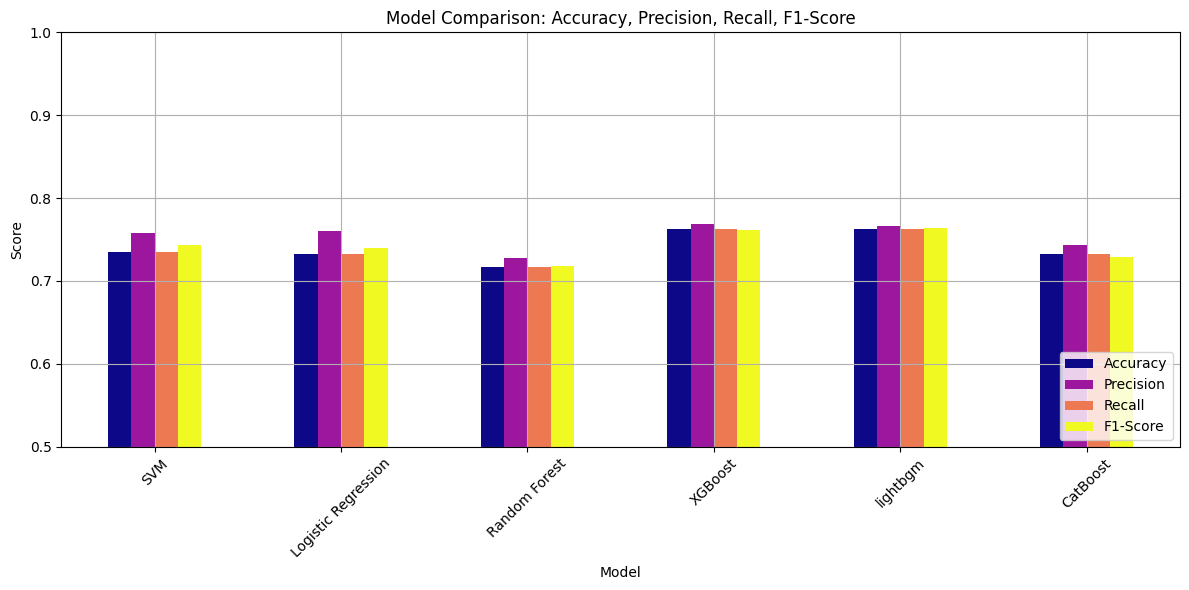

In [38]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df_plot = df_metrics.set_index('Model')
df_plot.plot(kind='bar', figsize=(12, 6), colormap='plasma')
plt.title("Model Comparison: Accuracy, Precision, Recall, F1-Score")
plt.ylabel("Score")
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

In [39]:
#making voting classifier 
from sklearn.ensemble import VotingClassifier
# Define base models
xgb_base= XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
lgbm_base = LGBMClassifier(random_state=42)
lr_base = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Create VotingClassifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_base), ('lgbm', lgbm_base), ('lr', lr_base)],
    voting='soft'
)

In [40]:
# Fit and evaluate
voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 77921
[LightGBM] [Info] Number of data points in the train set: 8151, number of used features: 2349
[LightGBM] [Info] Start training from score -1.358110
[LightGBM] [Info] Start training from score -1.435968
[LightGBM] [Info] Start training from score -2.299034
[LightGBM] [Info] Start training from score -3.285584
[LightGBM] [Info] Start training from score -1.775333
[LightGBM] [Info] Start training from score -1.716285
[LightGBM] [Info] Start training from score -4.623869
[LightGBM] [Info] Start training from score -4.801203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [41]:
print("Voting Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_vote):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_vote, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_vote, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_vote, average='weighted'):.4f}")

Voting Classifier Metrics:
Accuracy: 0.7826
Precision: 0.7853
Recall: 0.7826
F1-Score: 0.7807


In [42]:
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_vote))
print(classification_report(y_test, y_pred_vote))

Voting Classifier Accuracy: 0.7826300294406281
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       522
           1       0.90      0.87      0.89       500
           2       0.76      0.64      0.70       221
           3       0.90      0.84      0.87        63
           4       0.73      0.81      0.77       331
           5       0.74      0.74      0.74       362
           6       0.75      0.15      0.25        20
           7       0.81      0.68      0.74        19

    accuracy                           0.78      2038
   macro avg       0.79      0.69      0.71      2038
weighted avg       0.79      0.78      0.78      2038



In [43]:
model_preds = {
    'SVM': y_pred_svm,
    'Logistic Regression': y_pred,
    'Random Forest': y_pred_rf,
    'XGBoost' : y_pred_xgb,
    'lightbgm' : y_pred_lgb,
    'Voting Classifier' : y_pred_vote
}

In [44]:
# Initialize list to hold metric results
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
results = []
for model_name, y_pred in model_preds.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred,average='micro')
    rec = recall_score(y_test, y_pred,average='micro' )
    f1 = f1_score(y_test, y_pred,average='micro' )
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

In [45]:
# Create DataFrame
df_metrics = pd.DataFrame(results)

# Display table
print("Classification Metrics Comparison:\n")
print(df_metrics)

Classification Metrics Comparison:

                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.735525   0.735525  0.735525  0.735525
1  Logistic Regression  0.732090   0.732090  0.732090  0.732090
2        Random Forest  0.717370   0.717370  0.717370  0.717370
3              XGBoost  0.763003   0.763003  0.763003  0.763003
4             lightbgm  0.762512   0.762512  0.762512  0.762512
5    Voting Classifier  0.782630   0.782630  0.782630  0.782630


<Figure size 1200x600 with 0 Axes>

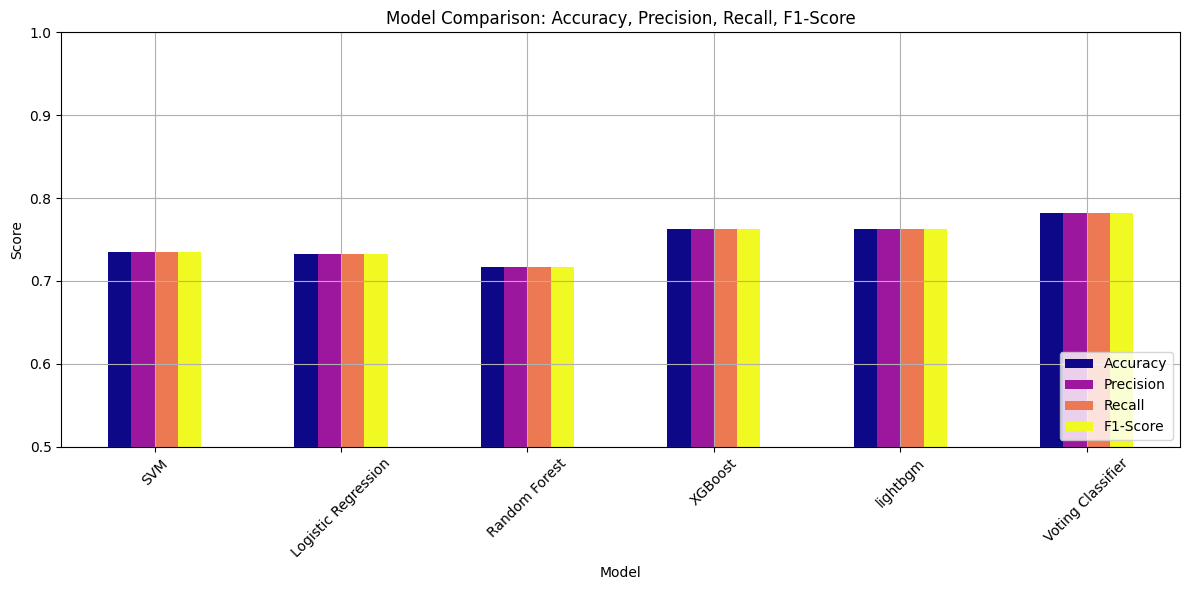

In [46]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df_plot = df_metrics.set_index('Model')
df_plot.plot(kind='bar', figsize=(12, 6), colormap='plasma')
plt.title("Model Comparison: Accuracy, Precision, Recall, F1-Score")
plt.ylabel("Score")
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

In [47]:
from sklearn.ensemble import StackingClassifier
# Define base models
base_learners = [
    ('svm', SVC(probability=True, random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('lgb', LGBMClassifier(random_state=42))
]
# Define meta-model (Logistic Regression as a simple example)
meta_model = LogisticRegression()
# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

In [48]:
# Train the model
stacking_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.110055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 77921
[LightGBM] [Info] Number of data points in the train set: 8151, number of used features: 2349
[LightGBM] [Info] Start training from score -1.358110
[LightGBM] [Info] Start training from score -1.435968
[LightGBM] [Info] Start training from score -2.299034
[LightGBM] [Info] Start training from score -3.285584
[LightGBM] [Info] Start training from score -1.775333
[LightGBM] [Info] Start training from score -1.716285
[LightGBM] [Info] Start training from score -4.623869
[LightGBM] [Info] Start training from score -4.801203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067113 seconds.
You can set `force_row_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('svm', SVC(probability=True, random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_ty...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lgb', LGBMClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [49]:
# Predict and evaluate
y_pred_stack = stacking_model.predict(X_test)

In [50]:
# Calculate micro-averaged metrics
accuracy = accuracy_score(y_test, y_pred_stack)
precision_micro = precision_score(y_test, y_pred_stack, average='micro')
recall_micro = recall_score(y_test, y_pred_stack, average='micro')
f1_micro = f1_score(y_test, y_pred_stack, average='micro')

print("Stacking Classifier Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Micro): {precision_micro:.4f}")
print(f"Recall (Micro): {recall_micro:.4f}")
print(f"F1-Score (Micro): {f1_micro:.4f}")

Stacking Classifier Metrics:
Accuracy: 0.7821
Precision (Micro): 0.7821
Recall (Micro): 0.7821
F1-Score (Micro): 0.7821


In [51]:
model_preds = {
    'SVM': y_pred_svm,
    'Logistic Regression': y_pred,
    'Random Forest': y_pred_rf,
    'XGBoost' : y_pred_xgb,
    'lightbgm' : y_pred_lgb,
    'Voting Classifier' : y_pred_vote,
    'Stacking Classifier':y_pred_stack
}

In [52]:
# Initialize list to hold metric results
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
results = []
for model_name, y_pred in model_preds.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred,average='micro')
    rec = recall_score(y_test, y_pred,average='micro' )
    f1 = f1_score(y_test, y_pred,average='micro' )
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

In [53]:
# Create DataFrame
df_metrics = pd.DataFrame(results)

# Display table
print("Classification Metrics Comparison:\n")
print(df_metrics)

Classification Metrics Comparison:

                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.735525   0.735525  0.735525  0.735525
1  Logistic Regression  0.782630   0.782630  0.782630  0.782630
2        Random Forest  0.717370   0.717370  0.717370  0.717370
3              XGBoost  0.763003   0.763003  0.763003  0.763003
4             lightbgm  0.762512   0.762512  0.762512  0.762512
5    Voting Classifier  0.782630   0.782630  0.782630  0.782630
6  Stacking Classifier  0.782139   0.782139  0.782139  0.782139


# as voting classifier is working fine so we are going with voting classifier]


In [54]:
test['Preprocess question']=test['Question'].apply(preprocess)

In [55]:
test.head()

,id,Question,Preprocess question
0,0,b'Solve 0 = -i - 91*i - 1598*i - 64220 for i.\n',b solve <NUM> = -i - <NUM>*i - <NUM>*i - <NUM>...
1,1,Galperin G.A.\n\nA natural number $N$ is 999.....,galperin g.a. a natural number n is <NUM>... <...
2,2,Example 7 Calculate $\frac{1}{2 \sqrt{1}+\sqrt...,example <NUM> calculate <NUM> divided by <NUM>...
3,3,"If $A$, $B$, and $C$ represent three distinct ...",if a b and c represent three distinct digits f...
4,4,2. Calculate $1+12+123+1234+12345+123456+12345...,<NUM>. calculate <NUM>+<NUM>+<NUM>+<NUM>+<NUM>...


In [56]:
test.isnull().sum()

id                     0
Question               0
Preprocess question    0
dtype: int64

In [57]:
test_vector = tfidf.transform(test['Preprocess question'])  

In [58]:
test_vector.shape

(3044, 15000)

In [59]:
test_predicted_value=voting_clf.predict(test_vector)

In [60]:
test['label']=test_predicted_value

In [61]:
test.head()

,id,Question,Preprocess question,label
0,0,b'Solve 0 = -i - 91*i - 1598*i - 64220 for i.\n',b solve <NUM> = -i - <NUM>*i - <NUM>*i - <NUM>...,0
1,1,Galperin G.A.\n\nA natural number $N$ is 999.....,galperin g.a. a natural number n is <NUM>... <...,4
2,2,Example 7 Calculate $\frac{1}{2 \sqrt{1}+\sqrt...,example <NUM> calculate <NUM> divided by <NUM>...,2
3,3,"If $A$, $B$, and $C$ represent three distinct ...",if a b and c represent three distinct digits f...,4
4,4,2. Calculate $1+12+123+1234+12345+123456+12345...,<NUM>. calculate <NUM>+<NUM>+<NUM>+<NUM>+<NUM>...,4


In [62]:

test['label'].value_counts()

label
0    851
1    709
5    548
4    512
2    298
3     90
7     23
6     13
Name: count, dtype: int64

In [63]:
test.drop(['Question', 'Preprocess question'], axis=1, inplace=True)

In [64]:
test

,id,label
0,0,0
1,1,4
2,2,2
3,3,4
4,4,4
...,...,...
3039,3039,4
3040,3040,1
3041,3041,1
3042,3042,4


In [65]:
test.to_csv("submission.csv",index=False)

In [66]:
print("Submission saved to submission.csv")

Submission saved to submission.csv
